# Лабораторная работа по Matplotlib и Seaborn

### *Часть 1. Matplotlib*

In [39]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pandas as pd 

### **Задача 1**


Используя библиотеку Matplotlib, для датасета "Ирисы", который подгружается кодом ниже, нарисуйте точечную диаграмму (scatter plot) всех четырех признаков. Каждый признак должен быть нарисован на отдельном графике. Используйте для этого subplot формата 2 на 2. Графики должны быть читаемыми, т. е. отрегулируйте размер subplot'ов. Добавьте названия признаков к каждому графику в качестве имени графика (названия признаков можно получить с помощью метода .feature_names). Используйте метки классов (y) в качестве цветовой разметки. Добавьте расшифровку цветов, соответствующих меткам классов, в качестве лейблов.

P.S. Используйте функцию plt.scatter(x, y, color).

In [40]:
from sklearn import datasets
data = datasets.load_iris(return_X_y=False)
X = data.data
y = data.target
names = data.target_names
feature_names = data.feature_names

### **Решение:**

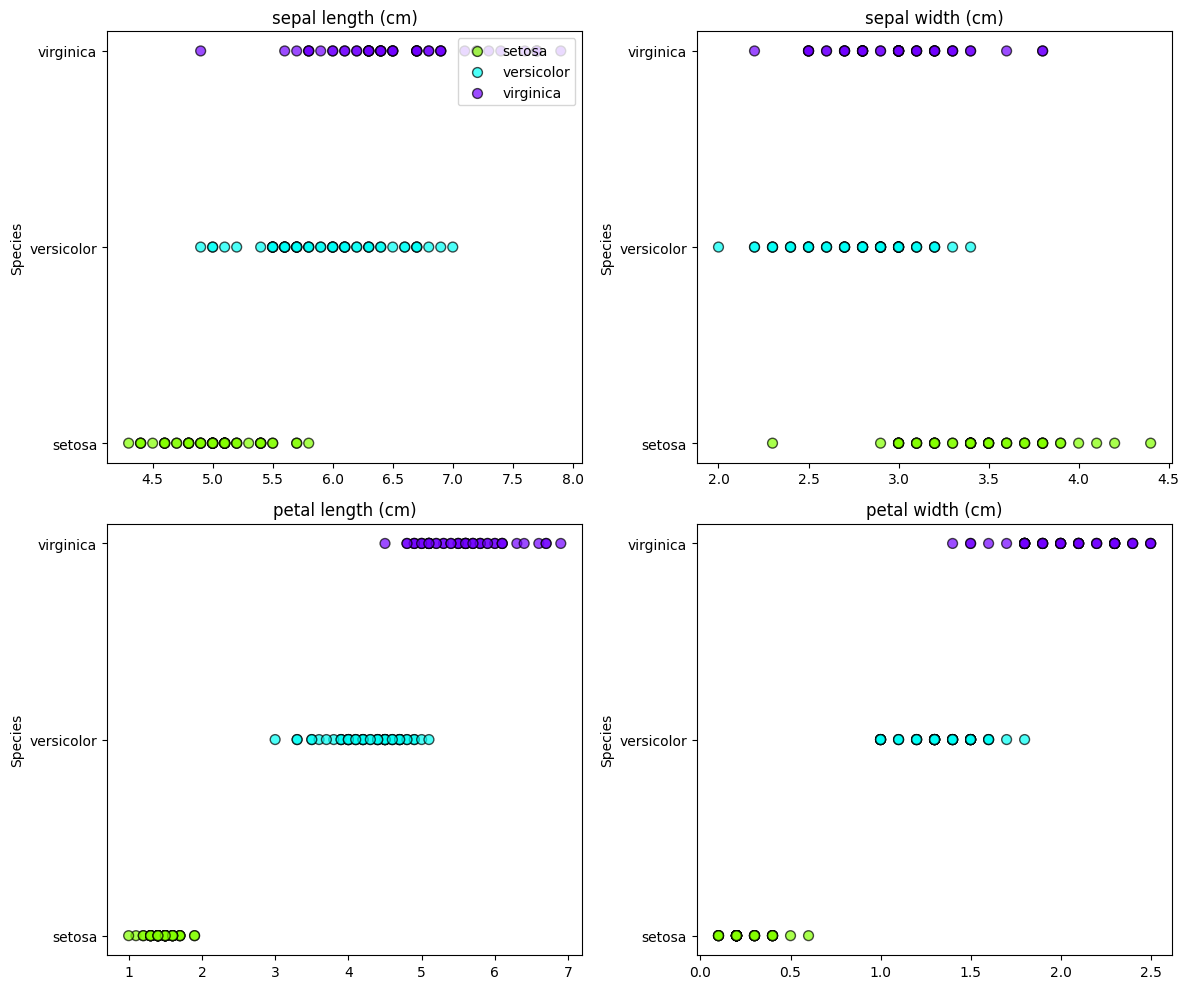

In [41]:
# Создаем DataFrame для удобства
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Создаем цвета для каждого класса
palette = sns.color_palette("hsv", 3) # Используем seaborn для создания палитры из 3 цветов
colors = [palette[x] for x in y]

# Создаем 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Массив для удобного обращения к графикам
ax = axes.ravel()

for i in range(4):
    # Для каждого признака строим scatter plot
    ax[i].scatter(df[feature_names[i]], df['target'], color=colors, edgecolor='k', alpha=0.7, s=50)
    ax[i].set_title(feature_names[i])
    ax[i].set_ylabel('Species')
    ax[i].set_yticks(range(len(names)))
    ax[i].set_yticklabels(names)

# Добавляем общую легенду для графиков
for i, name in enumerate(names):
    ax[0].scatter([], [], color=palette[i], label=name, edgecolor='k', alpha=0.7, s=50)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax[0].transAxes)

plt.tight_layout()
plt.show()

### **Задача 2**


Используя библиотеку Matplotlib, постройте гистограмму для первого признака в датасете выше следующим образом:
* на одном графике должно быть три гистограммы, по одной на каждый класс,
* для этого используйте методологии подвыборки массива с условием,
* количество бинов должно определяться автоматически (режим "auto"),
* гистограмма должна быть читаемой, т. е. добавьте подписи, лейблы, названия и т. д.

### **Решение:**

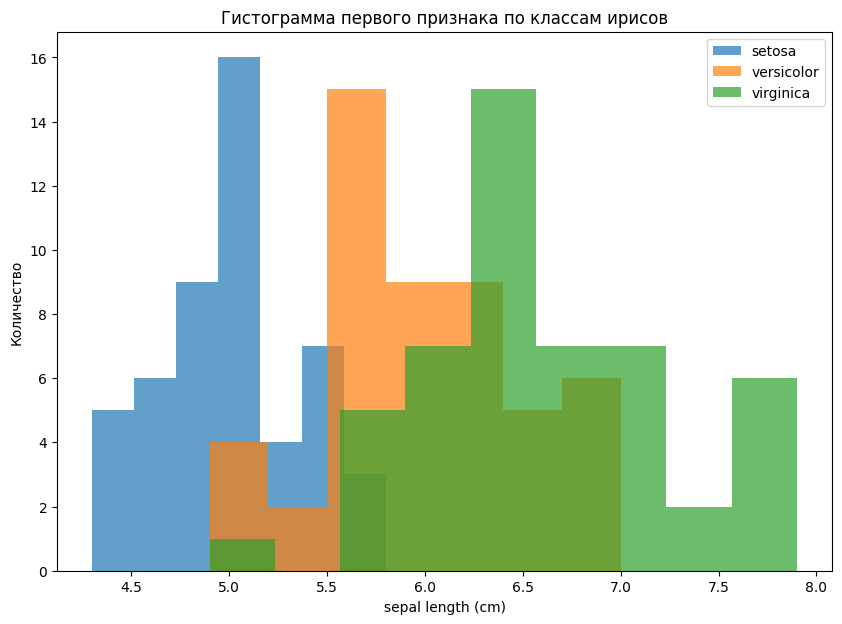

In [42]:
# Первый признак в датасете
first_feature = X[:, 0]

# Создаем гистограмму
plt.figure(figsize=(10, 7))  # Устанавливаем размер фигуры

# Цикл по классам ирисов
for i, name in enumerate(names):
    # Подвыборка для класса
    subset = first_feature[y == i]
    
    # Строим гистограмму для каждого класса
    plt.hist(subset, bins='auto', alpha=0.7, label=name)

# Добавляем название и лейблы
plt.title("Гистограмма первого признака по классам ирисов")
plt.xlabel(feature_names[0])
plt.ylabel("Количество")

# Добавляем легенду
plt.legend()

# Показываем график
plt.show()

### **Задача 3**


Используя библиотеку Matplotlib, посчитайте матрицу корреляции между признаками и нарисуйте ее как heatmap. Подберите подходящую по смыслу цветовую гамму. Добавьте названия признаков в качестве тиков по осям. Добавьте отрисовку цветовой шкалы.

### **Решение:**

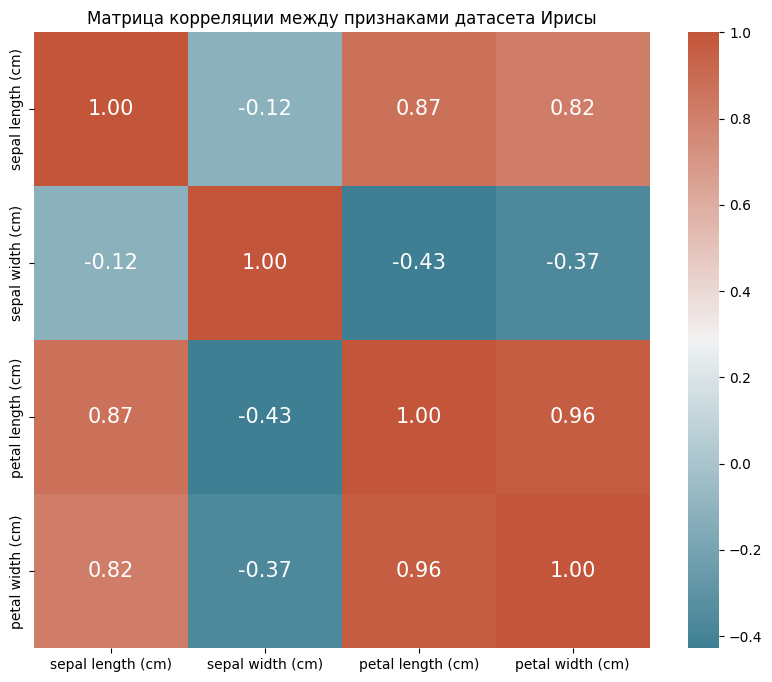

In [43]:
# Загружаем датасет
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


# Считаем матрицу корреляции
corr_matrix = df.corr()

# Выбираем цветовую гамму
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(10, 8))
# Строим heatmap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, cbar=True, square=True,
            fmt='.2f', annot_kws={'size': 15},
            xticklabels=iris.feature_names, yticklabels=iris.feature_names)

# Добавляем название графика
plt.title('Матрица корреляции между признаками датасета Ирисы')

# Показываем график
plt.show()

### *Часть 2. Seaborn*

### **Задача 4**


Для датасета Occupancy (datatraining.txt) постройте диаграмму присутствия в разбивке по часам и меткам классов *(метки классов хранятся в столбце 'occupancy)'*. Для этого сделайте следующее:
*   создайте новый столбец "hour", отвечающий соответствующему часу, 
*   нарисуйте sns.countplot этого столбца в разбивке по Occupancy.

### **Решение:**

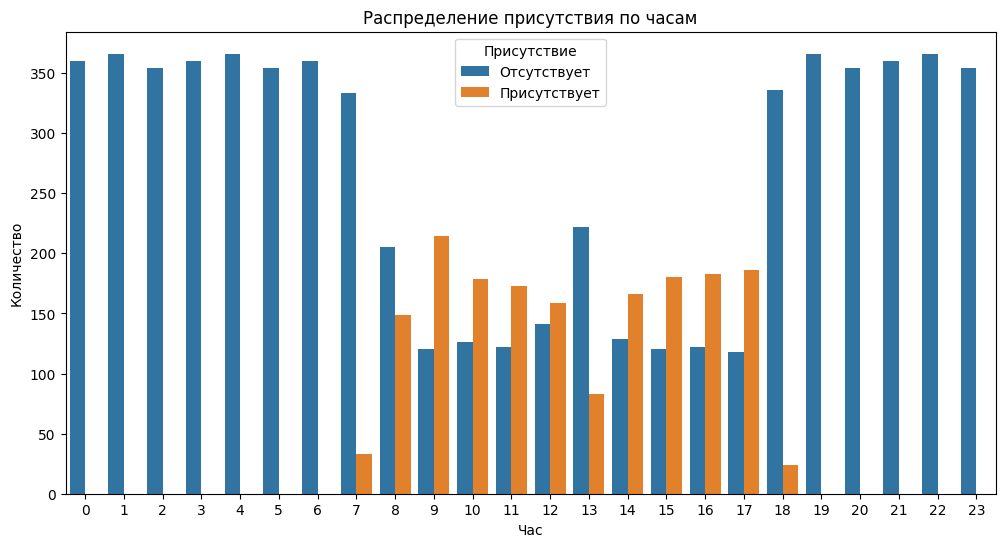

In [44]:
# Шаг 1: Загрузка данных
df = pd.read_csv('C:\Python Projects\lab-project-2\datasets\datatraining.txt')

# Шаг 2: Преобразование 'date' в datetime
df['date'] = pd.to_datetime(df['date'])

# Шаг 3: Создание столбца 'hour'
df['hour'] = df['date'].dt.hour

# Шаг 4: Создание графика
plt.figure(figsize=(12, 6))  # Установка размера фигуры
sns.countplot(data=df, x='hour', hue='Occupancy')  # Создание countplot
plt.title('Распределение присутствия по часам')  # Заголовок
plt.xlabel('Час')  # Подпись оси X
plt.ylabel('Количество')  # Подпись оси Y
plt.legend(title='Присутствие', labels=['Отсутствует', 'Присутствует'])  # Легенда
plt.show()  # Показать график

### **Задача 5**


Сделайте resample данных по получасовому интервалу с использованием усреднения для всех признаков.

Постройте sns.jointplot между признаками Light и CO2.

### **Решение:**

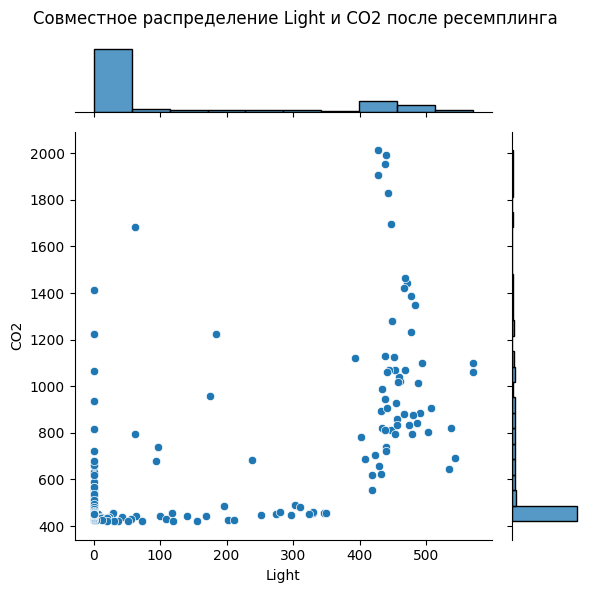

In [45]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')  # Устанавливаем столбец даты в качестве индекса

# Шаг 2: Ресемплинг данных
df_resampled = df.resample('30min').mean()  # Ресемплинг с интервалом в 30 минут и усреднением

# Шаг 3: Построение графика
sns.jointplot(data=df_resampled, x='Light', y='CO2', kind="scatter")  # Можно изменить kind на "hex" или "kde" для другого вида графика
plt.suptitle('Совместное распределение Light и CO2 после ресемплинга')  # Заголовок
plt.tight_layout()  # Автоматическая корректировка подписей и заголовков
plt.show()  # Показать график